In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()

1081

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.count().max() 

283726

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')

No Frauds 99.83 %
Frauds 0.17 %


Text(0.5, 1.0, '0: No Fraud / 1: Fraud')

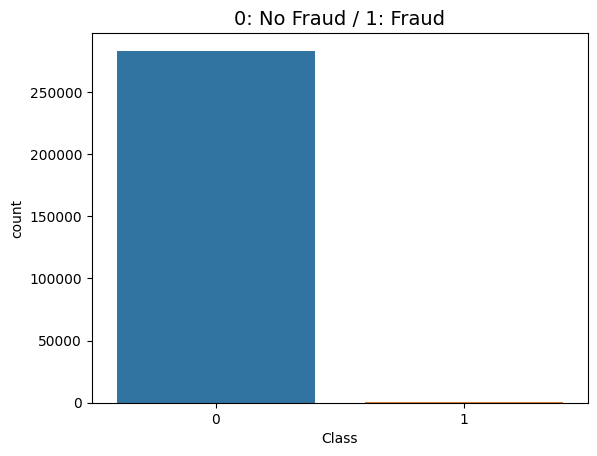

In [11]:
sns.countplot(x='Class', data=df)
plt.title('0: No Fraud / 1: Fraud', fontsize=14)

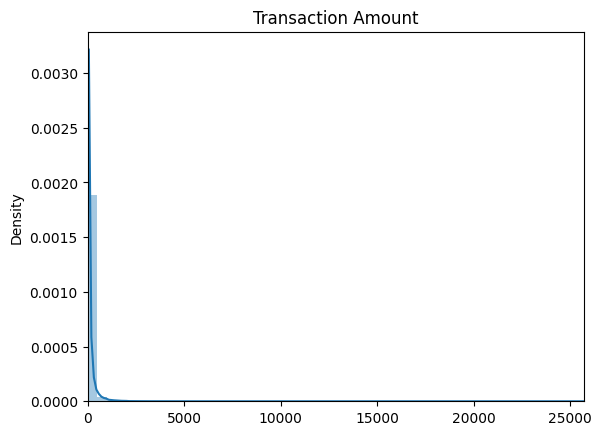

In [12]:
amount_val = df['Amount'].values

sns.distplot(amount_val)
plt.title('Transaction Amount')
plt.xlim([min(amount_val), max(amount_val)])

plt.show()

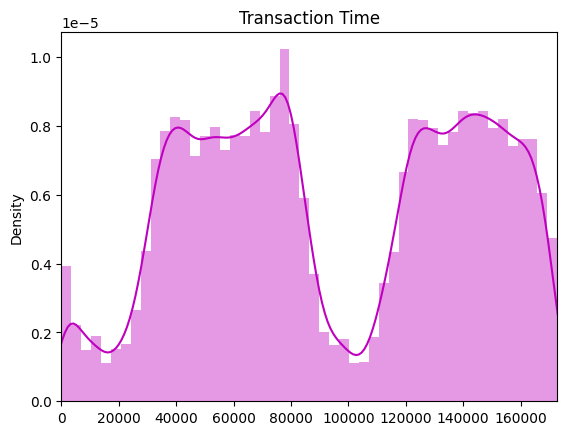

In [13]:
time_val = df['Time'].values
sns.distplot(time_val,color='m')
plt.title('Transaction Time')
plt.xlim([min(time_val), max(time_val)])

plt.show()

In [14]:
"""sns.boxplot(df['Time'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'Time')
sns.boxplot(df['Time'])
plt.title("Box Plot after outlier removing")
plt.show()"""

'sns.boxplot(df[\'Time\'])\nplt.title("Box Plot before outlier removing")\nplt.show()\ndef drop_outliers(df, field_name):\n    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))\n    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)\n    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)\ndrop_outliers(df, \'Time\')\nsns.boxplot(df[\'Time\'])\nplt.title("Box Plot after outlier removing")\nplt.show()'

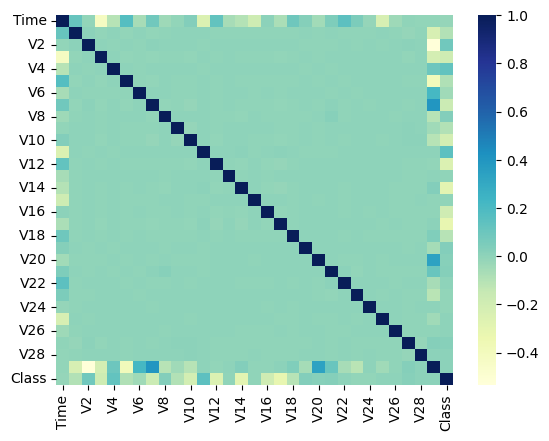

<Figure size 1000x1000 with 0 Axes>

In [15]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu")
#, cmap="Spectral"
plt.figure(figsize = (10,10))

plt.show()

In [16]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


In [17]:
"""no corr  >>   28,26,24,22,20,
-ve corr >>  18,16,14,12,10,
+ve corr >>  2,4,6,8,"""

'no corr  >>   28,26,24,22,20,\n-ve corr >>  18,16,14,12,10,\n+ve corr >>  2,4,6,8,'

In [18]:
"""sns.boxplot(x="V2", data=df)
plt.show()"""

'sns.boxplot(x="V2", data=df)\nplt.show()'

In [19]:
"""sns.boxplot(x="V17", data=df)"""

'sns.boxplot(x="V17", data=df)'

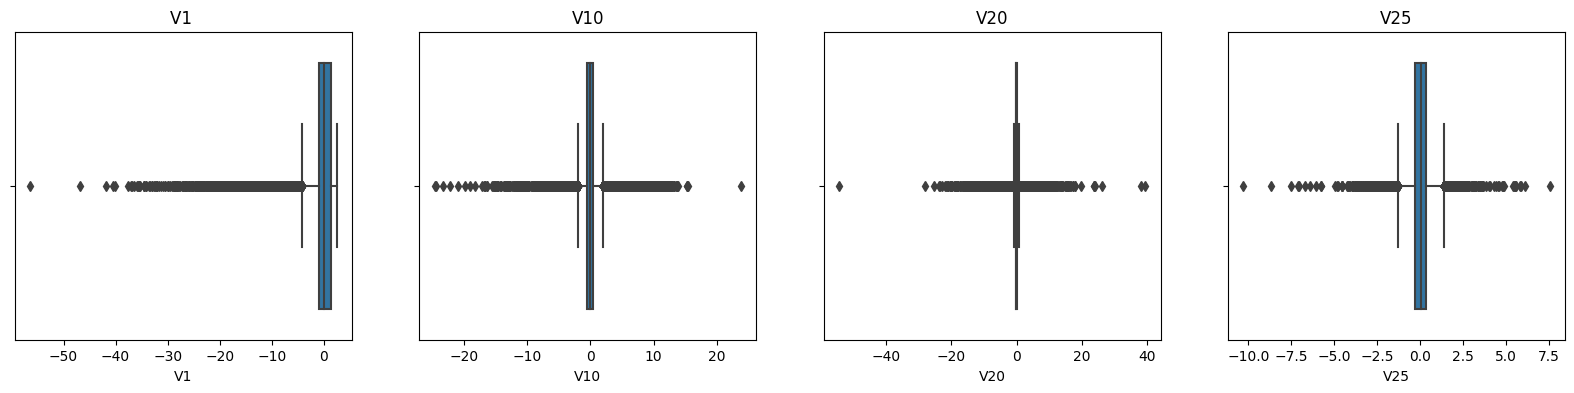

In [20]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="V1", data=df,  ax=axes[0])
axes[0].set_title('V1 ')

sns.boxplot(x="V10", data=df,  ax=axes[1])
axes[1].set_title('V10')

sns.boxplot(x="V20", data=df, ax=axes[2])
axes[2].set_title('V20')

sns.boxplot(x="V25", data=df, ax=axes[3])
axes[3].set_title('V25')

plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

stand_data2=["Time","Amount", 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

scaler2 = StandardScaler()
df[stand_data2] = scaler2.fit_transform(df[stand_data2])

df[stand_data2].head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.996823,0.244200,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,...,0.497011,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850
1,-1.996823,-0.342584,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,...,-0.178907,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219
2,-1.996802,1.158900,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,...,-2.780497,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824
3,-1.996802,0.139886,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,...,-1.515112,-0.270428,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687
4,-1.996781,-0.073813,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,...,0.988165,0.530343,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234


In [22]:
"""X = np.log(X)"""

'X = np.log(X)'

In [23]:
#for all data
"""from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))

df.head()"""

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\ndf = pd.DataFrame(scaler.fit_transform(df))\n\ndf.head()'

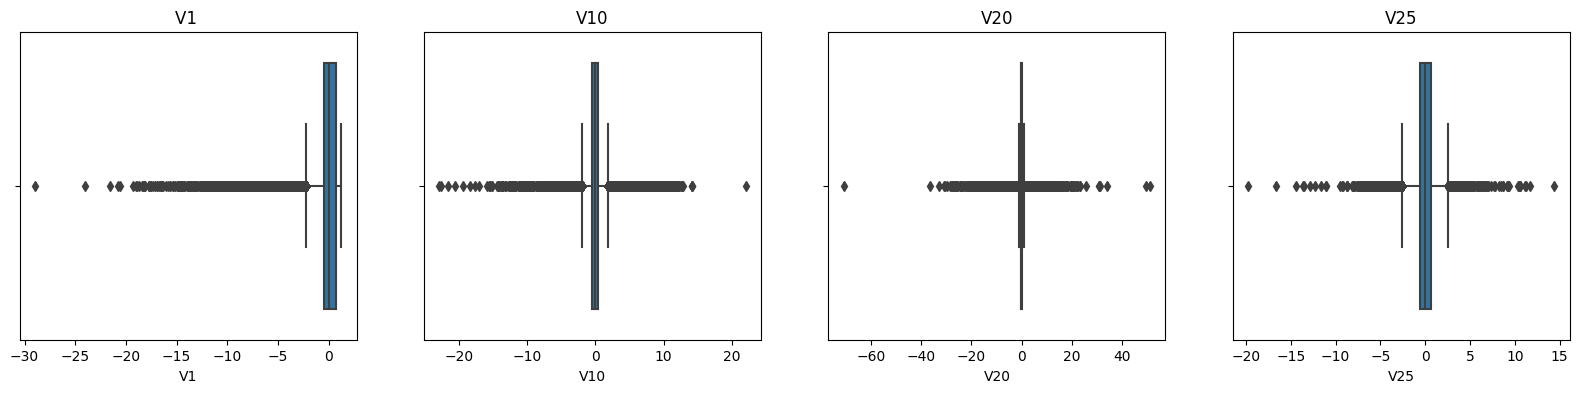

In [24]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="V1", data=df,  ax=axes[0])
axes[0].set_title('V1 ')

sns.boxplot(x="V10", data=df,  ax=axes[1])
axes[1].set_title('V10')

sns.boxplot(x="V20", data=df, ax=axes[2])
axes[2].set_title('V20')

sns.boxplot(x="V25", data=df, ax=axes[3])
axes[3].set_title('V25')

plt.show()

In [25]:
"""from sklearn.preprocessing import StandardScaler

stand_data=["Time","Amount"]

scaler = StandardScaler()
df[stand_data] = scaler.fit_transform(df[stand_data])

df[stand_data].head()"""

'from sklearn.preprocessing import StandardScaler\n\nstand_data=["Time","Amount"]\n\nscaler = StandardScaler()\ndf[stand_data] = scaler.fit_transform(df[stand_data])\n\ndf[stand_data].head()'

In [26]:
X = df.drop(['Class'], axis=1.0)
Y = df['Class'] 

In [27]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, Y)

In [28]:
np.isfinite(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
284803,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
284804,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
284805,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [29]:
print('No Frauds', round(y_res.value_counts()[0]/len(df) * 100,2),'%')
print('Frauds', round(y_res.value_counts()[1]/len(df) * 100,2),'%')

No Frauds 99.83 %
Frauds 99.83 %


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [31]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle df rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95890,-0.617070,-0.180762,0.838842,0.454742,0.735294,0.675660,0.002747,0.554436,0.097885,-1.034293,...,0.145113,0.550551,-0.474791,-0.693073,-0.159990,-0.434373,0.464982,0.483444,-0.349333,0
243749,1.205682,-1.838931,2.006177,-4.946079,5.506083,-0.290759,-1.477033,-2.535126,-0.277807,-1.435673,...,0.747472,0.993088,0.607744,-1.019072,-0.849121,0.746167,-6.705328,1.285377,-0.349333,1
42590,-1.129865,-3.048576,2.778817,-6.249745,4.652884,-4.442280,-2.748390,-8.875311,3.146649,-5.347310,...,2.783008,-0.231042,0.079797,0.634411,-0.148980,1.172785,4.523764,1.129361,-0.332161,1
201601,0.824476,0.265861,0.932679,-2.769312,2.536860,-0.744936,-0.376395,-1.542580,0.745744,-1.406079,...,1.177263,1.624378,0.726879,0.800820,-0.960161,-0.224942,0.676483,-0.194475,0.166683,1
150660,-0.020178,-3.178492,4.315977,-8.638064,5.666733,-5.727692,-2.983202,-9.963175,4.217019,-3.876538,...,3.457819,0.664836,0.770817,0.594599,-0.562377,-0.413529,-0.519732,1.214476,-0.174013,1


Class
0    293.526425
1      0.490155
Name: count, dtype: float64


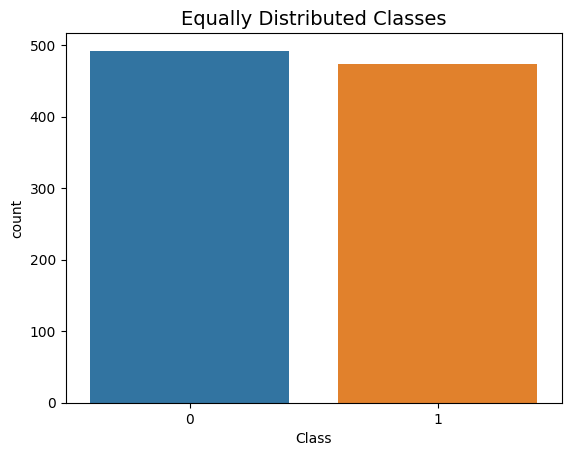

In [32]:
print(df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

##### **before balancing**

In [33]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2),'%')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2),'%')

No Frauds 99.83 %
Frauds 0.17 %


##### **after balancing**

In [34]:
print('No Frauds', round(new_df['Class'].value_counts()[0]/len(new_df) * 100,2), '%')
print('Frauds', round(new_df['Class'].value_counts()[1]/len(new_df) * 100,2), '%')

No Frauds 50.98 %
Frauds 49.02 %


In [35]:
df = df.replace("NaN","nan")

df = df.fillna(df.mean())


In [36]:
print(np.any(np.isnan(df)))

False


In [37]:
print(np.all(np.isfinite(df)))

True


In [38]:
#X.fillna(0, inplace=True)

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100,"%")

Accuracy: 99.97811151828394 %


In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.9486467975739089


In [41]:
from numpy import loadtxt
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%
